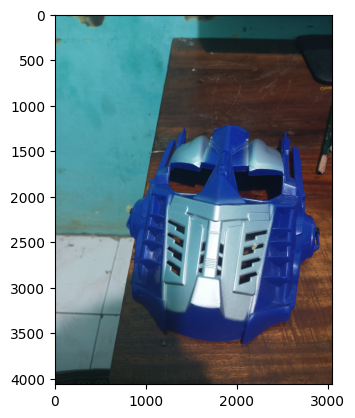

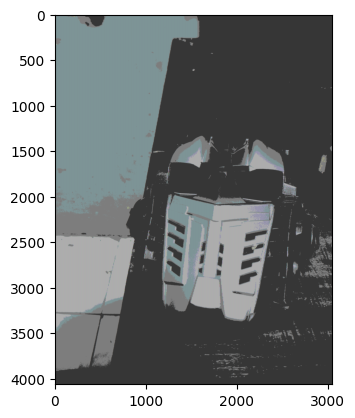

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# membaca gambar gunakan gambar sesuai dengan yg dimiliki
image = cv2.imread('Topeng.jpg')

# Mengubah warna ke RGB (dari BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1, 8))

# Mengkonversikan ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria agar algoritme berhenti berjalan,
# yang akan terjadi adalah 100 iterasi dijalankan atau epsilon (yang merupakan
# akurasi yang dibutuhkan) menjadi 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Melakukan k-means clustering dengan jumlah cluster yang ditetapkan sebagai 3
# Juga pusat acak pada awalnya dipilih untuk pengelompokan k-means
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image.shape))

# Menampilkan gambar hasil segmentasi
plt.imshow(segmented_image)
plt.show()


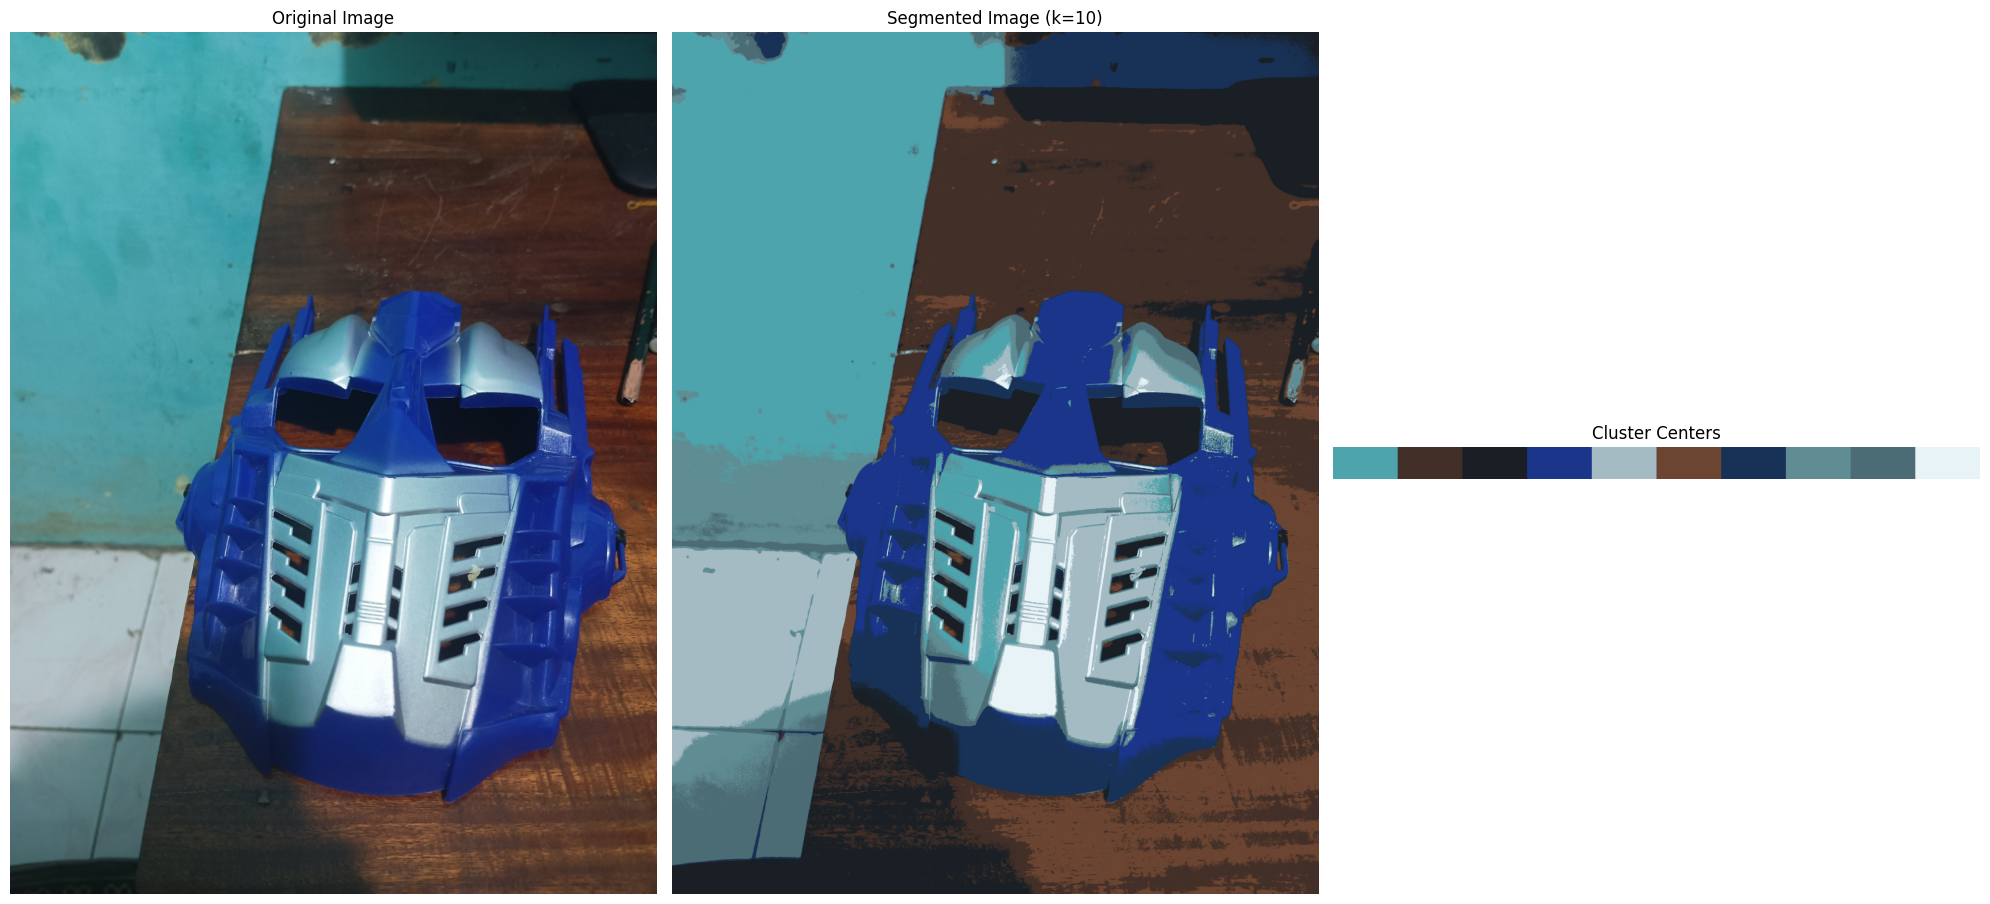

Original Image Size: (4064, 3048, 3)
Segmented Image Size: (4064, 3048, 3)

Cluster Details:
Cluster 9: 2587361 pixels (Color: [ 77 164 172])
Cluster 3: 2404293 pixels (Color: [66 47 40])
Cluster 4: 1423920 pixels (Color: [25 31 36])
Cluster 2: 1252567 pixels (Color: [ 26  53 138])
Cluster 1: 1193474 pixels (Color: [164 187 196])
Cluster 8: 992080 pixels (Color: [107  69  49])
Cluster 5: 952234 pixels (Color: [24 50 87])
Cluster 7: 770466 pixels (Color: [ 96 140 147])
Cluster 0: 599284 pixels (Color: [ 76 108 117])
Cluster 6: 211393 pixels (Color: [231 243 247])


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

# Membaca gambar
image_path = 'Topeng.jpg'
image = cv2.imread(image_path)

# Mengubah warna gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image_rgb.reshape((-1, 3))

# Mengonversi ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Menjalankan k-means clustering. anda bisa mengatur angkanya sesuai dengan keinginan anda
k = 10
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image_rgb.shape))

# Menampilkan gambar hasil clustering
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image (k={k})')
plt.axis('off')

# Menampilkan warna kluster sebagai bar horizontal
color_counts = Counter(labels.flatten())
sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)

bar_height = 50
bar = np.zeros((bar_height, len(sorted_colors) * 100, 3), dtype=np.uint8)

for i, (cluster_num, count) in enumerate(sorted_colors):
    bar[:, i * 100:(i + 1) * 100] = centers[cluster_num]

plt.subplot(1, 3, 3)
plt.imshow(bar)
plt.title('Cluster Centers')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan rincian kluster
print(f"Original Image Size: {image_rgb.shape}")
print(f"Segmented Image Size: {segmented_image.shape}")
print("\nCluster Details:")

for cluster_num, count in sorted_colors:
    print(f"Cluster {cluster_num}: {count} pixels (Color: {centers[cluster_num]})")